## Ali Darabi - 810100264
## CA3 - Hidden Markov Models

In [1]:
import numpy as np
from python_speech_features import mfcc
import os
from scipy.io import  wavfile
import matplotlib.pyplot as plt
from hmmlearn import hmm
from sklearn.metrics import confusion_matrix
from prettytable import PrettyTable
from scipy.stats import multivariate_normal
import random

In [2]:
folder_names = ['blues', 'hiphop', 'metal', 'pop']
all_mfccs = {'blues': [], 'hiphop': [], 'metal': [], 'pop': []}
for name in folder_names:
    folder_direction = os.path.join(name)
    for filename in os.listdir(folder_direction)[:100]:
        audio_file = os.path.join(folder_direction, filename)
        s_freq, audio = wavfile.read(audio_file)
        audio_features = mfcc(audio, s_freq, nfft=1024)
        all_mfccs[name].append(audio_features)

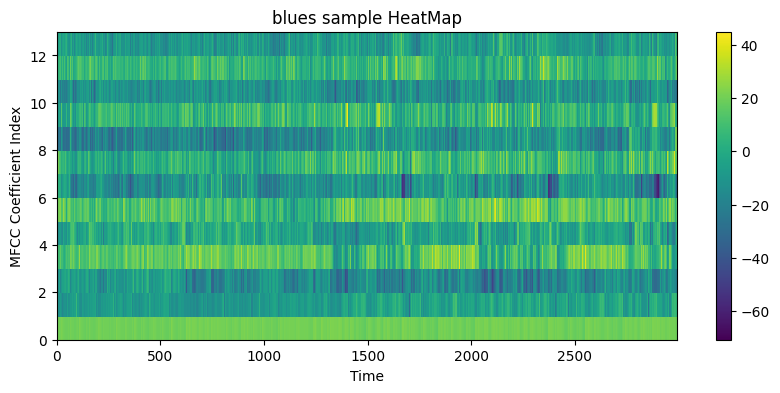

In [3]:
mfcc = all_mfccs['blues'][50]
plt.figure(figsize=(10, 4))
plt.pcolor(mfcc.T)
plt.title('blues sample HeatMap')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Time')
plt.colorbar()
plt.show()

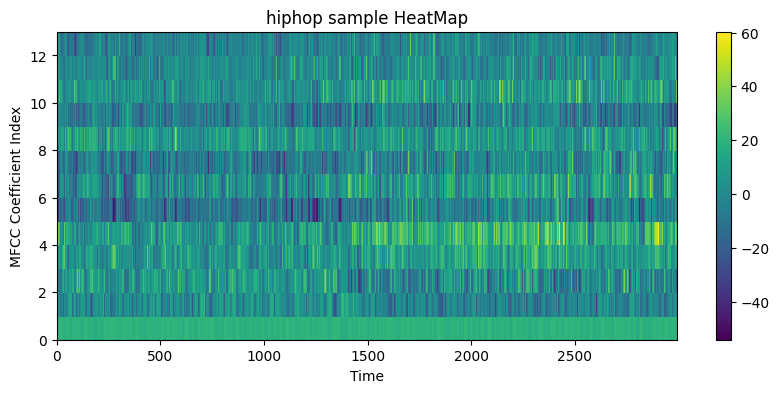

In [4]:
mfcc = all_mfccs['hiphop'][50]
plt.figure(figsize=(10, 4))
plt.pcolor(mfcc.T)
plt.title('hiphop sample HeatMap')
plt.ylabel('MFCC Coefficient Index')
plt.xlabel('Time')
plt.colorbar()
plt.show()

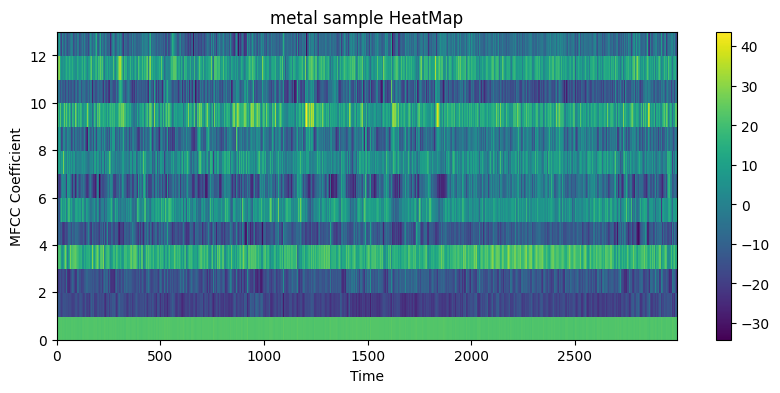

In [5]:
mfcc = all_mfccs['metal'][50]
plt.figure(figsize=(10, 4))
plt.pcolor(mfcc.T)
plt.title('metal sample HeatMap')
plt.ylabel('MFCC Coefficient')
plt.xlabel('Time')
plt.colorbar()
plt.show()

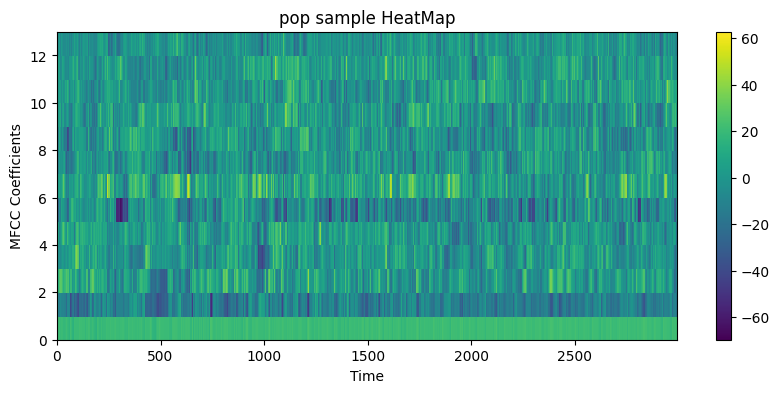

In [6]:
mfcc = all_mfccs['pop'][50]
plt.figure(figsize=(10, 4))
plt.pcolor(mfcc.T)
plt.title('pop sample HeatMap')
plt.ylabel('MFCC Coefficients')
plt.xlabel('Time')
plt.colorbar()
plt.show()

In [7]:
data_for_train = {'blues': [], 'hiphop': [], 'metal': [], 'pop': []}
data_for_test = {'blues': [], 'hiphop': [], 'metal': [], 'pop': []}

for name in folder_names:
    mfccs = all_mfccs[name] 
    random.shuffle(mfccs)
    train_size = 80
    test_size = len(mfccs) - train_size
    for i in range(train_size):
        data_for_train[name].append(mfccs[i][:2980,:])
    for i in range(train_size, len(mfccs)):  
        data_for_test[name].append(mfccs[i][:2980,:])

data_for_train['blues'] = np.array(data_for_train['blues'])
blues_train_data = data_for_train['blues'].reshape(-1, 13)

data_for_train['hiphop'] = np.array(data_for_train['hiphop'])
hiphop_train_data = data_for_train['hiphop'].reshape(-1, 13)

data_for_train['metal'] = np.array(data_for_train['metal'])
metal_train_data = data_for_train['metal'].reshape(-1, 13)

data_for_train['pop'] = np.array(data_for_train['pop'])
pop_train_data = data_for_train['pop'].reshape(-1, 13)

blues_model = hmm.GaussianHMM(n_components=4, n_iter=10)
blues_model.fit(blues_train_data)

hiphop_model = hmm.GaussianHMM(n_components=4, n_iter=10)
hiphop_model.fit(hiphop_train_data)

metal_model = hmm.GaussianHMM(n_components=4, n_iter=10)
metal_model.fit(metal_train_data)

pop_model = hmm.GaussianHMM(n_components=4, n_iter=10)
pop_model.fit(pop_train_data)

GaussianHMM(n_components=4)

In [8]:
all_test_data = np.vstack([data_for_test['blues'], data_for_test['hiphop'], data_for_test['metal'], data_for_test['pop']])
predicted_labels = []
for i in range(80):
    blue_score = blues_model.score(all_test_data[i])
    hiphop_score = hiphop_model.score(all_test_data[i])
    metal_score = metal_model.score(all_test_data[i])
    pop_score = pop_model.score(all_test_data[i])
    max_score = max(blue_score, hiphop_score, metal_score, pop_score)
    if (max_score == blue_score):
        predicted_labels.append(0)
    elif (max_score == hiphop_score):
        predicted_labels.append(1)
    elif (max_score == metal_score):
        predicted_labels.append(2)
    else:
        predicted_labels.append(3)

true_labels = 20 * [0] + 20 * [1] + 20 * [2] + 20 * [3]
conf_mat = confusion_matrix(y_true=true_labels, y_pred=predicted_labels)
conf_table = PrettyTable()
conf_table.field_names = ["", "Predicted Blues", "Predicted HipHop", "Predicted Metal", "Predicted Pop"]
conf_table.add_row(["True Blues", conf_mat[0][0], conf_mat[0][1], conf_mat[0][2], conf_mat[0][3]])
conf_table.add_row(["True HipHop", conf_mat[1][0], conf_mat[1][1], conf_mat[1][2], conf_mat[1][3]]) 
conf_table.add_row(["True Metal", conf_mat[2][0], conf_mat[2][1], conf_mat[2][2], conf_mat[2][3]])
conf_table.add_row(["True Pop", conf_mat[3][0], conf_mat[3][1], conf_mat[3][2], conf_mat[3][3]])

print(conf_table)

+-------------+-----------------+------------------+-----------------+---------------+
|             | Predicted Blues | Predicted HipHop | Predicted Metal | Predicted Pop |
+-------------+-----------------+------------------+-----------------+---------------+
|  True Blues |        15       |        1         |        4        |       0       |
| True HipHop |        2        |        11        |        1        |       6       |
|  True Metal |        0        |        3         |        16       |       1       |
|   True Pop  |        0        |        1         |        0        |       19      |
+-------------+-----------------+------------------+-----------------+---------------+


In [9]:
blues_accuracy = (conf_mat[0][0] + conf_mat[1][1] + conf_mat[1][2] + conf_mat[1][3] + conf_mat[2][1] + conf_mat[2][2] + conf_mat[2][3] + conf_mat[3][1] + conf_mat[3][2] + conf_mat[3][3])  / 80
hiphop_accuracy = (conf_mat[1][1] + conf_mat[0][0] + conf_mat[0][2] + conf_mat[0][3] + conf_mat[2][0] + conf_mat[3][0] + conf_mat[2][2] + conf_mat[2][3] + conf_mat[3][2] + conf_mat[3][3]) / 80
metal_accuracy = (conf_mat[2][2] + conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][0] + conf_mat[1][1] + conf_mat[0][3] + conf_mat[1][3] + conf_mat[3][0] + conf_mat[3][1] + conf_mat[3][3]) / 80
pop_accuracy = (conf_mat[3][3] + conf_mat[0][0] + conf_mat[0][1] + conf_mat[0][2] + conf_mat[1][0] + conf_mat[1][1] + conf_mat[1][2] + conf_mat[2][0] + conf_mat[2][1] + conf_mat[2][2]) / 80
print("Blues accuracy: ", blues_accuracy) 
print("Hiphop accuracy: ", hiphop_accuracy)
print("Metal accuracy: ", metal_accuracy)
print("Pop accuracy: ", pop_accuracy)
total_accuracy = (conf_mat[0][0] + conf_mat[1][1] + conf_mat[2][2] + conf_mat[3][3]) / 80
print("Total Accuracy: ", total_accuracy)

Blues accuracy:  0.9125
Hiphop accuracy:  0.825
Metal accuracy:  0.8875
Pop accuracy:  0.9
Total Accuracy:  0.7625


In [10]:
blues_precision = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[1][0] + conf_mat[2][0] + conf_mat[3][0]) 
hiphop_precision = conf_mat[1][1] / (conf_mat[0][1] + conf_mat[1][1] + conf_mat[2][1] + conf_mat[3][1])
metal_precision = conf_mat[2][2] / (conf_mat[0][2] + conf_mat[1][2] + conf_mat[2][2] + conf_mat[3][2])  
pop_precision = conf_mat[3][3] / (conf_mat[0][3] + conf_mat[1][3] + conf_mat[2][3] + conf_mat[3][3])
print("Blues precision: ", blues_precision)
print("Hiphop precision: ", hiphop_precision) 
print("Metal precision: ", metal_precision)
print("Pop precision: ", pop_precision)

Blues precision:  0.8823529411764706
Hiphop precision:  0.6875
Metal precision:  0.7619047619047619
Pop precision:  0.7307692307692307


In [11]:
blues_recall = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[0][1] + conf_mat[0][2] + conf_mat[0][3]) 
hiphop_recall = conf_mat[1][1] / (conf_mat[1][0] + conf_mat[1][1] + conf_mat[1][2] + conf_mat[1][3])
metal_recall = conf_mat[2][2] / (conf_mat[2][0] + conf_mat[2][1] + conf_mat[2][2] + conf_mat[2][3])  
pop_recall = conf_mat[3][3] / (conf_mat[3][0] + conf_mat[3][1] + conf_mat[3][2] + conf_mat[3][3])
print("Blues recall: ", blues_recall)
print("Hiphop recall: ", hiphop_recall) 
print("Metal recall: ", metal_recall)
print("Pop recall: ", pop_recall)

Blues recall:  0.75
Hiphop recall:  0.55
Metal recall:  0.8
Pop recall:  0.95


In [12]:
def f1_score_calculator(precision, recall):
    f1_score = (2 * precision * recall) / (precision + recall)
    return f1_score

blue_F1_Score = f1_score_calculator(blues_precision, blues_recall)
hiphop_F1_Score = f1_score_calculator(hiphop_precision, hiphop_recall)
metal_F1_Score = f1_score_calculator(metal_precision, metal_recall)
pop_F1_Score = f1_score_calculator(pop_precision, pop_recall)
print("Blues F1 Score: ", blue_F1_Score)
print("Hiphop F1 Score: ", hiphop_F1_Score) 
print("Metal F1 Score: ", metal_F1_Score)
print("Pop F1 Score: ", pop_F1_Score)

Blues F1 Score:  0.8108108108108107
Hiphop F1 Score:  0.6111111111111112
Metal F1 Score:  0.7804878048780488
Pop F1 Score:  0.8260869565217392


In [13]:
#Macro :
print("Macro F1 Score = ", (blue_F1_Score + hiphop_F1_Score + metal_F1_Score + pop_F1_Score)/4)
print("Macro Precision = ", (blues_precision + hiphop_precision + metal_precision + pop_precision)/4)
print("Macro Recall = ", (blues_recall + hiphop_recall + metal_recall + pop_recall)/4)

Macro F1 Score =  0.7571241708304275
Macro Precision =  0.7656317334626158
Macro Recall =  0.7625


In [14]:
#Weighted
print("Weighted F1 Score = ", (20 * blue_F1_Score + 20 * hiphop_F1_Score + 20 * metal_F1_Score + 20 * pop_F1_Score)/80)
print("Weighted Precision = ", (20 * blues_precision + 20 * hiphop_precision + 20 * metal_precision + 20 * pop_precision)/80)
print("Weighted Recall = ", (20 * blues_recall + 20 * hiphop_recall + 20 * metal_recall + 20 * pop_recall)/80)

Weighted F1 Score =  0.7571241708304275
Weighted Precision =  0.7656317334626157
Weighted Recall =  0.7625


In [15]:
#Micro
Micro = (conf_mat[0][0] + conf_mat[1][1] + conf_mat[2][2] + conf_mat[3][3]) / 80 
print("Micro F1 Score = ", Micro)
print("Micro Precision = ", Micro)
print("Micro Recall = ", Micro)
print("Accuracy = ", Micro)

Micro F1 Score =  0.7625
Micro Precision =  0.7625
Micro Recall =  0.7625
Accuracy =  0.7625


In [16]:
class HMM:
    def __init__(self, num_hidden_states):
        self.num_hidden_states = num_hidden_states
        self.rand_state = np.random.RandomState(1)

        self.initial_prob = self._normalize(self.rand_state.rand(self.num_hidden_states, 1))
        self.transition_matrix = self._stochasticize(self.rand_state.rand(self.num_hidden_states, self.num_hidden_states))

        self.mean = None
        self.covariances = None
        self.num_dimensions = None

    def _forward(self, observation_matrix):
        log_likelihood = 0.
        T = observation_matrix.shape[1]
        alpha = np.zeros(observation_matrix.shape)

        for t in range(T):
            if t == 0:
                initial_probability = self.initial_prob.flatten()
                alpha[:, t] = initial_probability * observation_matrix[:, t]
                ## TODO: Forward algorithm for the first time step
            else:
                alpha[:, t] = np.dot(alpha[:, t-1] * self.transition_matrix.T, observation_matrix[:, t])
                ## TODO: Forward algorithm for the next time steps

            alpha_sum = np.sum(alpha[:, t])
            alpha[:, t] /= alpha_sum
            log_likelihood += np.log(alpha_sum)

        return log_likelihood, alpha

    def _backward(self, observation_matrix):
        T = observation_matrix.shape[1]
        beta = np.zeros(observation_matrix.shape)

        beta[:, -1] = np.ones(observation_matrix.shape[0])

        for t in range(T - 1)[::-1]:
            #beta[:, t] = ## TODO: Backward algorithm for the time steps of the HMM
            beta[:, t] = np.dot(self.transition_matrix, observation_matrix[:, t+1] * beta[:, t+1])
            beta[:, t] /= np.sum(beta[:, t])

        return beta

    def _state_likelihood(self, obs):
        obs = np.atleast_2d(obs)
        B = np.zeros((self.num_hidden_states, obs.shape[1]))

        for s in range(self.num_hidden_states):
            np.random.seed(self.rand_state.randint(1))
            #B[s, :] = ## TODO: Compute the likelihood of observations with multivariate normal pdf
            B[s, :] = multivariate_normal.pdf(obs.T, mean=self.mean[:,s], cov=self.covariances[:,:,s])

        return B

    def _normalize(self, x):
        return (x + (x == 0)) / np.sum(x)

    def _stochasticize(self, x):
        return (x + (x == 0)) / np.sum(x, axis=1)

    def _em_init(self, obs):
        if self.num_dimensions is None:
            self.num_dimensions = obs.shape[0]
        if self.mean is None:
            subset = self.rand_state.choice(np.arange(self.num_dimensions), size=self.num_hidden_states, replace=False)
            self.mean = obs[:, subset]
        if self.covariances is None:
            self.covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
            self.covariances += np.diag(np.diag(np.cov(obs)))[:, :, None]

        return self

    def _em_step(self, obs):
        obs = np.atleast_2d(obs)
        T = obs.shape[1]

        #B = ## TODO
        B = self._state_likelihood(obs)

        #log_likelihood, alpha = ## TODO
        log_likelihood, alpha = self._forward(B)
        #beta = ## TODO
        beta = self._backward(B)

        xi_sum = np.zeros((self.num_hidden_states, self.num_hidden_states))
        gamma = np.zeros((self.num_hidden_states, T))

        for t in range(T - 1):
            #partial_sum = ## TODO
            partial_sum = alpha[:, t, None] * beta[:, t+1, None].T * self.transition_matrix * B[:, t+1, None]
            xi_sum += self._normalize(partial_sum)
            #partial_g = ## TODO
            partial_g = alpha[:, t] * beta[:, t]
            gamma[:, t] = self._normalize(partial_g)
        #partial_g = ## TODO
        partial_g = alpha[:, -1] * beta[:, -1] 
        gamma[:, -1] = self._normalize(partial_g)

        #expected_prior = ## TODO
        expected_prior = gamma[:, 0]
        #expected_transition = self._stochasticize(## TODO)
        expected_transition = self._stochasticize(xi_sum / np.sum(gamma, axis=1)[:, None])

        expected_covariances = np.zeros((self.num_dimensions, self.num_dimensions, self.num_hidden_states))
        expected_covariances += .01 * np.eye(self.num_dimensions)[:, :, None]

        gamma_state_sum = np.sum(gamma, axis=1)
        gamma_state_sum = gamma_state_sum + (gamma_state_sum == 0)

        expected_mean = np.zeros((self.num_dimensions, self.num_hidden_states))
        for s in range(self.num_hidden_states):
            gamma_obs = obs * gamma[s, :]
            expected_mean[:, s] = np.sum(gamma_obs, axis=1) / gamma_state_sum[s]

        self.initial_prob = expected_prior
        self.mean = expected_mean
        self.covariances = expected_covariances
        self.transition_matrix = expected_transition

        return log_likelihood

    def train(self, obs, num_iterations=1):
        #we add this part
        obs = self._normalize(obs)
        for i in range(num_iterations):
            self._em_init(obs)
            self._em_step(obs)
        return self

    def score(self, obs):
        #we add this part
        obs = self._normalize(obs)
        B = self._state_likelihood(obs)
        log_likelihood, _ = self._forward(B)
        return log_likelihood


In [17]:
blues_model_new = HMM(5)
blues_model_new.train(blues_train_data.T, 5)

hiphop_model_new = HMM(5)
hiphop_model_new.train(hiphop_train_data.T, 5)

metal_model_new = HMM(5)
metal_model_new.train(metal_train_data.T, 5)

pop_model_new = HMM(5)
pop_model_new.train(pop_train_data.T, 5)

In [18]:
predicted_labels_HMM = []
for i in range(80):
    blue_score = blues_model_new.score(all_test_data[i].T)
    hiphop_score = hiphop_model_new.score(all_test_data[i].T)
    metal_score = metal_model_new.score(all_test_data[i].T)
    pop_score = pop_model_new.score(all_test_data[i].T)
    max_score = max(blue_score, hiphop_score, metal_score, pop_score)
    if (max_score == blue_score):
        predicted_labels_HMM.append(0)
    elif (max_score == hiphop_score):
        predicted_labels_HMM.append(1)
    elif (max_score == metal_score):
        predicted_labels_HMM.append(2)
    else:
        predicted_labels_HMM.append(3)


true_labels = 20 * [0] + 20 * [1] + 20 * [2] + 20 * [3]
conf_mat = confusion_matrix(y_true=true_labels, y_pred=predicted_labels_HMM)
conf_table = PrettyTable()
conf_table.field_names = ["", "Predicted Blues", "Predicted HipHop", "Predicted Metal", "Predicted Pop"]
conf_table.add_row(["True Blues", conf_mat[0][0], conf_mat[0][1], conf_mat[0][2], conf_mat[0][3]])
conf_table.add_row(["True HipHop", conf_mat[1][0], conf_mat[1][1], conf_mat[1][2], conf_mat[1][3]]) 
conf_table.add_row(["True Metal", conf_mat[2][0], conf_mat[2][1], conf_mat[2][2], conf_mat[2][3]])
conf_table.add_row(["True Pop", conf_mat[3][0], conf_mat[3][1], conf_mat[3][2], conf_mat[3][3]])
print(conf_table)
total_accuracy = (conf_mat[0][0] + conf_mat[1][1] + conf_mat[2][2] + conf_mat[3][3]) / 80
print("Total Accuracy: ", total_accuracy)

+-------------+-----------------+------------------+-----------------+---------------+
|             | Predicted Blues | Predicted HipHop | Predicted Metal | Predicted Pop |
+-------------+-----------------+------------------+-----------------+---------------+
|  True Blues |        0        |        4         |        16       |       0       |
| True HipHop |        0        |        14        |        3        |       3       |
|  True Metal |        0        |        9         |        11       |       0       |
|   True Pop  |        0        |        4         |        1        |       15      |
+-------------+-----------------+------------------+-----------------+---------------+
Total Accuracy:  0.5


In [19]:
blues_accuracy = (conf_mat[0][0] + conf_mat[1][1] + conf_mat[1][2] + conf_mat[1][3] + conf_mat[2][1] + conf_mat[2][2] + conf_mat[2][3] + conf_mat[3][1] + conf_mat[3][2] + conf_mat[3][3])  / 80
hiphop_accuracy = (conf_mat[1][1] + conf_mat[0][0] + conf_mat[0][2] + conf_mat[0][3] + conf_mat[2][0] + conf_mat[3][0] + conf_mat[2][2] + conf_mat[2][3] + conf_mat[3][2] + conf_mat[3][3]) / 80
metal_accuracy = (conf_mat[2][2] + conf_mat[0][0] + conf_mat[0][1] + conf_mat[1][0] + conf_mat[1][1] + conf_mat[0][3] + conf_mat[1][3] + conf_mat[3][0] + conf_mat[3][1] + conf_mat[3][3]) / 80
pop_accuracy = (conf_mat[3][3] + conf_mat[0][0] + conf_mat[0][1] + conf_mat[0][2] + conf_mat[1][0] + conf_mat[1][1] + conf_mat[1][2] + conf_mat[2][0] + conf_mat[2][1] + conf_mat[2][2]) / 80
print("Blues accuracy: ", blues_accuracy) 
print("Hiphop accuracy: ", hiphop_accuracy)
print("Metal accuracy: ", metal_accuracy)
print("Pop accuracy: ", pop_accuracy)
total_accuracy = (conf_mat[0][0] + conf_mat[1][1] + conf_mat[2][2] + conf_mat[3][3]) / 80
print("Total Accuracy: ", total_accuracy)

Blues accuracy:  0.75
Hiphop accuracy:  0.7125
Metal accuracy:  0.6375
Pop accuracy:  0.9
Total Accuracy:  0.5


In [20]:
blues_precision = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[1][0] + conf_mat[2][0] + conf_mat[3][0]) 
hiphop_precision = conf_mat[1][1] / (conf_mat[0][1] + conf_mat[1][1] + conf_mat[2][1] + conf_mat[3][1])
metal_precision = conf_mat[2][2] / (conf_mat[0][2] + conf_mat[1][2] + conf_mat[2][2] + conf_mat[3][2])  
pop_precision = conf_mat[3][3] / (conf_mat[0][3] + conf_mat[1][3] + conf_mat[2][3] + conf_mat[3][3])
print("Blues precision: ", blues_precision)
print("Hiphop precision: ", hiphop_precision) 
print("Metal precision: ", metal_precision)
print("Pop precision: ", pop_precision)

Blues precision:  nan
Hiphop precision:  0.45161290322580644
Metal precision:  0.3548387096774194
Pop precision:  0.8333333333333334


C:\Users\asus\AppData\Local\Temp\ipykernel_8452\656054292.py:1: RuntimeWarning: invalid value encountered in scalar divide
  blues_precision = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[1][0] + conf_mat[2][0] + conf_mat[3][0])


In [21]:
blues_recall = conf_mat[0][0] / (conf_mat[0][0] + conf_mat[0][1] + conf_mat[0][2] + conf_mat[0][3]) 
hiphop_recall = conf_mat[1][1] / (conf_mat[1][0] + conf_mat[1][1] + conf_mat[1][2] + conf_mat[1][3])
metal_recall = conf_mat[2][2] / (conf_mat[2][0] + conf_mat[2][1] + conf_mat[2][2] + conf_mat[2][3])  
pop_recall = conf_mat[3][3] / (conf_mat[3][0] + conf_mat[3][1] + conf_mat[3][2] + conf_mat[3][3])
print("Blues recall: ", blues_recall)
print("Hiphop recall: ", hiphop_recall) 
print("Metal recall: ", metal_recall)
print("Pop recall: ", pop_recall)

Blues recall:  0.0
Hiphop recall:  0.7
Metal recall:  0.55
Pop recall:  0.75


In [22]:
def f1_score_calculator(precision, recall):
    f1_score = (2 * precision * recall) / (precision + recall)
    return f1_score

blue_F1_Score = f1_score_calculator(blues_precision, blues_recall)
hiphop_F1_Score = f1_score_calculator(hiphop_precision, hiphop_recall)
metal_F1_Score = f1_score_calculator(metal_precision, metal_recall)
pop_F1_Score = f1_score_calculator(pop_precision, pop_recall)
print("Blues F1 Score: ", blue_F1_Score)
print("Hiphop F1 Score: ", hiphop_F1_Score) 
print("Metal F1 Score: ", metal_F1_Score)
print("Pop F1 Score: ", pop_F1_Score)

Blues F1 Score:  nan
Hiphop F1 Score:  0.5490196078431372
Metal F1 Score:  0.43137254901960786
Pop F1 Score:  0.7894736842105262


In [23]:
#Macro :
print("Macro F1 Score = ", (blue_F1_Score + hiphop_F1_Score + metal_F1_Score + pop_F1_Score)/4)
print("Macro Precision = ", (blues_precision + hiphop_precision + metal_precision + pop_precision)/4)
print("Macro Recall = ", (blues_recall + hiphop_recall + metal_recall + pop_recall)/4)

Macro F1 Score =  nan
Macro Precision =  nan
Macro Recall =  0.5


In [24]:
#Weighted
print("Weighted F1 Score = ", (20 * blue_F1_Score + 20 * hiphop_F1_Score + 20 * metal_F1_Score + 20 * pop_F1_Score)/80)
print("Weighted Precision = ", (20 * blues_precision + 20 * hiphop_precision + 20 * metal_precision + 20 * pop_precision)/80)
print("Weighted Recall = ", (20 * blues_recall + 20 * hiphop_recall + 20 * metal_recall + 20 * pop_recall)/80)

Weighted F1 Score =  nan
Weighted Precision =  nan
Weighted Recall =  0.5


In [25]:
#Micro
Micro = (conf_mat[0][0] + conf_mat[1][1] + conf_mat[2][2] + conf_mat[3][3]) / 80 
print("Micro F1 Score = ", Micro)
print("Micro Precision = ", Micro)
print("Micro Recall = ", Micro)
print("Accuracy = ", Micro)

Micro F1 Score =  0.5
Micro Precision =  0.5
Micro Recall =  0.5
Accuracy =  0.5
